## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import difflib

pd.set_option('display.max_rows', None)

In [2]:
PROVINCE_NAMES = ['Hà Nội', 'Vĩnh Phúc', 'Bắc Ninh', 'Quảng Ninh', 'Hải Dương', 'Hải Phòng', 
                  'Hưng Yên', 'Thái Bình', 'Hà Nam', 'Nam Định', 'Ninh Bình', 'Hà Giang', 
                  'Cao Bằng', 'Bắc Kạn', 'Tuyên Quang', 'Lào Cai', 'Điện Biên', 'Lai Châu', 
                  'Sơn La', 'Yên Bái', 'Hoà Bình', 'Thái Nguyên', 'Lạng Sơn', 'Bắc Giang', 
                  'Phú Thọ', 'Thanh Hóa', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị', 
                  'Thừa Thiên - Huế', 'Đà Nẵng', 'Quảng Nam', 'Quảng Ngãi', 'Bình Định', 
                  'Phú Yên', 'Khánh Hòa', 'Ninh Thuận', 'Bình Thuận', 'Kon Tum', 'Gia Lai', 
                  'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng', 'Bình Phước', 'Tây Ninh', 'Bình Dương', 
                  'Đồng Nai', 'Bà Rịa - Vũng Tàu', 'TP. Hồ Chí Minh', 'Long An', 'Tiền Giang', 
                  'Bến Tre', 'Trà Vinh', 'Vĩnh Long', 'Đồng Tháp', 'An Giang', 'Kiên Giang', 
                  'TP. Cần Thơ', 'Hậu Giang', 'Sóc Trăng', 'Bạc Liêu', 'Cà Mau']

# Clean Data

## 1. Đầu tư giáo dục

In [3]:
DTGD_CRAWL_FILE_PATH = '../DATA/RAW DATA/Đầu tư giáo dục [2018-2023]/data-crawl-from-web.xlsx'
URL = ["https://ckns.mof.gov.vn/SitePages/nsdp-qt-Chi.aspx", "https://cknsanalysis.mof.gov.vn/custom/single/?appid=d18e8b76-f3c3-4193-8aeb-0160a9385bca&sheet=bcb6df54-3983-4ec0-be9c-5be8ffc72c2b&select=clearall&qlikTicket="]

In [4]:
try:
    df = pd.read_excel(DTGD_CRAWL_FILE_PATH)
    print(df)
except PermissionError as e:
    print(f"Failed to read the file: {e}")


           Unnamed: 0 Đơn vị tính: Triệu đồng  \
0                 NaN             Năm báo cáo   
1                 NaN            Các chỉ tiêu   
2          Địa phương                 So sánh   
3            An Giang                     NaN   
4   Bà Rịa - Vũng Tàu                     NaN   
5           Bắc Giang                     NaN   
6             Bắc Kạn                     NaN   
7            Bạc Liêu                     NaN   
8            Bắc Ninh                     NaN   
9             Bến Tre                     NaN   
10          Bình Định                     NaN   
11         Bình Dương                     NaN   
12             Cà Mau                     NaN   
13            Cần Thơ                     NaN   
14           Cao Bằng                     NaN   
15            Đà Nẵng                     NaN   
16            Đắk Lắk                     NaN   
17           Đắk Nông                     NaN   
18          Điện Biên                     NaN   
19           Đồng Na

In [5]:
df.head(10)

,Unnamed: 0,Đơn vị tính: Triệu đồng,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Năm báo cáo,2018,2019,2020,2021,2022,2023
1,NaN,Các chỉ tiêu,Chi giáo dục - đào tạo và dạy nghề,Chi giáo dục - đào tạo và dạy nghề,Chi giáo dục - đào tạo và dạy nghề,Chi giáo dục - đào tạo và dạy nghề,Chi giáo dục - đào tạo và dạy nghề,Chi giáo dục - đào tạo và dạy nghề
2,Địa phương,So sánh,Dự toán NS cấp Tỉnh,Dự toán NS cấp Tỉnh,Dự toán NS cấp Tỉnh,Dự toán NS cấp Tỉnh,Dự toán NS cấp Tỉnh,Dự toán NS cấp Tỉnh
3,An Giang,NaN,698.327,770.919,706.612,715.631,-,-
4,Bà Rịa - Vũng Tàu,NaN,-,-,1.685.634,1.239.637,1.404.207,-
5,Bắc Giang,NaN,880.775,777.001,893.298,855.066,840.194,-
6,Bắc Kạn,NaN,-,275.112,-,187.094,463.753,-
7,Bạc Liêu,NaN,472.639,880.247,277.847,367.387,602.971,-
8,Bắc Ninh,NaN,1.322.746,2.027.226,1.277.081,1.586.982,1.473.629,-
9,Bến Tre,NaN,884.822,1.110.825,1.292.151,1.268.352,860.173,-


In [6]:
df.shape #Thiếu Huế, Bình Phước, Bình Thuận

(67, 8)

### Xóa ba hàng đầu

In [7]:
df = df.drop([0, 1, 2])
df = df.reset_index(drop=True)

df.head()

,Unnamed: 0,Đơn vị tính: Triệu đồng,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,An Giang,NaN,698.327,770.919,706.612,715.631,-,-
1,Bà Rịa - Vũng Tàu,NaN,-,-,1.685.634,1.239.637,1.404.207,-
2,Bắc Giang,NaN,880.775,777.001,893.298,855.066,840.194,-
3,Bắc Kạn,NaN,-,275.112,-,187.094,463.753,-
4,Bạc Liêu,NaN,472.639,880.247,277.847,367.387,602.971,-


### Xóa cột thứ 2


In [8]:
df = df.drop(df.columns[1], axis=1)
df.head(10)

,Unnamed: 0,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,An Giang,698.327,770.919,706.612,715.631,-,-
1,Bà Rịa - Vũng Tàu,-,-,1.685.634,1.239.637,1.404.207,-
2,Bắc Giang,880.775,777.001,893.298,855.066,840.194,-
3,Bắc Kạn,-,275.112,-,187.094,463.753,-
4,Bạc Liêu,472.639,880.247,277.847,367.387,602.971,-
5,Bắc Ninh,1.322.746,2.027.226,1.277.081,1.586.982,1.473.629,-
6,Bến Tre,884.822,1.110.825,1.292.151,1.268.352,860.173,-
7,Bình Định,651.710,667.130,667.130,763.223,1,-
8,Bình Dương,1.912.319,2.223.083,3.103.078,2.832.295,2.026.742,-
9,Cà Mau,2.211.146,389.737,427.844,438.128,599.171,-


In [9]:
df.columns = ['Địa phương', '2018', '2019', '2020', '2021', '2022', '2023']
df.head(10)

,Địa phương,2018,2019,2020,2021,2022,2023
0,An Giang,698.327,770.919,706.612,715.631,-,-
1,Bà Rịa - Vũng Tàu,-,-,1.685.634,1.239.637,1.404.207,-
2,Bắc Giang,880.775,777.001,893.298,855.066,840.194,-
3,Bắc Kạn,-,275.112,-,187.094,463.753,-
4,Bạc Liêu,472.639,880.247,277.847,367.387,602.971,-
5,Bắc Ninh,1.322.746,2.027.226,1.277.081,1.586.982,1.473.629,-
6,Bến Tre,884.822,1.110.825,1.292.151,1.268.352,860.173,-
7,Bình Định,651.710,667.130,667.130,763.223,1,-
8,Bình Dương,1.912.319,2.223.083,3.103.078,2.832.295,2.026.742,-
9,Cà Mau,2.211.146,389.737,427.844,438.128,599.171,-


### Thay thế - bằng NaN

In [10]:
df.replace('-', np.NaN, inplace=True)

In [11]:
df.head(10)

,Địa phương,2018,2019,2020,2021,2022,2023
0,An Giang,698.327,770.919,706.612,715.631,NaN,NaN
1,Bà Rịa - Vũng Tàu,NaN,NaN,1.685.634,1.239.637,1.404.207,NaN
2,Bắc Giang,880.775,777.001,893.298,855.066,840.194,NaN
3,Bắc Kạn,NaN,275.112,NaN,187.094,463.753,NaN
4,Bạc Liêu,472.639,880.247,277.847,367.387,602.971,NaN
5,Bắc Ninh,1.322.746,2.027.226,1.277.081,1.586.982,1.473.629,NaN
6,Bến Tre,884.822,1.110.825,1.292.151,1.268.352,860.173,NaN
7,Bình Định,651.710,667.130,667.130,763.223,1,NaN
8,Bình Dương,1.912.319,2.223.083,3.103.078,2.832.295,2.026.742,NaN
9,Cà Mau,2.211.146,389.737,427.844,438.128,599.171,NaN


### Lưu dưới dạng file csv

In [12]:
data = defaultdict(lambda: defaultdict(lambda: 0))

for i in range(0, df.shape[0]):
    for year in range(2018, 2023):
        data[df.at[i, "Địa phương"]][year] = df.at[i, str(year)]

# Mở file CSV để ghi
with open('education.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Địa phương', 'Năm', 'Chi tiêu cho giáo dục']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Viết header
    writer.writeheader()

    # Viết dữ liệu từ data vào file CSV
    for province, years in data.items():
        for year, value in years.items():
            if province != np.NaN:
                writer.writerow({'Địa phương': province, 'Năm': year, 'Chi tiêu cho giáo dục': value})
    

In [13]:
data = pd.read_csv('education.csv')
data.head(10)

,Địa phương,Năm,Chi tiêu cho giáo dục
0,An Giang,2018,698.327
1,An Giang,2019,770.919
2,An Giang,2020,706.612
3,An Giang,2021,715.631
4,An Giang,2022,NaN
5,Bà Rịa - Vũng Tàu,2018,NaN
6,Bà Rịa - Vũng Tàu,2019,NaN
7,Bà Rịa - Vũng Tàu,2020,1.685.634
8,Bà Rịa - Vũng Tàu,2021,1.239.637
9,Bà Rịa - Vũng Tàu,2022,1.404.207


### Xóa Các dòng có địa phương là NaN

In [14]:
data.dropna(subset=['Địa phương'], inplace=True)
data.head(10)

,Địa phương,Năm,Chi tiêu cho giáo dục
0,An Giang,2018,698.327
1,An Giang,2019,770.919
2,An Giang,2020,706.612
3,An Giang,2021,715.631
4,An Giang,2022,NaN
5,Bà Rịa - Vũng Tàu,2018,NaN
6,Bà Rịa - Vũng Tàu,2019,NaN
7,Bà Rịa - Vũng Tàu,2020,1.685.634
8,Bà Rịa - Vũng Tàu,2021,1.239.637
9,Bà Rịa - Vũng Tàu,2022,1.404.207


### Danh sách địa phương

In [15]:
province = data['Địa phương'].unique()

In [16]:
province.shape

(63,)

In [17]:
province_df = pd.DataFrame(province, columns=['province'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['province']])

In [18]:
province_df[province_df['exact'] == False]

,province,exact
10,Cần Thơ,False
26,Hồ Chí Minh,False
60,Huế,False


In [19]:
data = data.replace('Cần Thơ', 'TP. Cần Thơ')
data = data.replace('Hồ Chí Minh', 'TP. Hồ Chí Minh')
data = data.replace('Hoà Bình', 'Hòa Bình')
data = data.replace('Huế', 'Thừa Thiên - Huế')

In [20]:
data['Địa phương'].unique()

array(['An Giang', 'Bà Rịa - Vũng Tàu', 'Bắc Giang', 'Bắc Kạn',
       'Bạc Liêu', 'Bắc Ninh', 'Bến Tre', 'Bình Định', 'Bình Dương',
       'Cà Mau', 'TP. Cần Thơ', 'Cao Bằng', 'Đà Nẵng', 'Đắk Lắk',
       'Đắk Nông', 'Điện Biên', 'Đồng Nai', 'Đồng Tháp', 'Gia Lai',
       'Hà Giang', 'Hà Nam', 'Hà Nội', 'Hà Tĩnh', 'Hải Dương',
       'Hải Phòng', 'Hậu Giang', 'TP. Hồ Chí Minh', 'Hòa Bình',
       'Hưng Yên', 'Khánh Hòa', 'Kiên Giang', 'Kon Tum', 'Lai Châu',
       'Lâm Đồng', 'Lạng Sơn', 'Lào Cai', 'Long An', 'Nam Định',
       'Nghệ An', 'Ninh Bình', 'Ninh Thuận', 'Phú Thọ', 'Phú Yên',
       'Quảng Bình', 'Quảng Nam', 'Quảng Ngãi', 'Quảng Ninh', 'Quảng Trị',
       'Sóc Trăng', 'Sơn La', 'Tây Ninh', 'Thái Bình', 'Thái Nguyên',
       'Thanh Hóa', 'Tiền Giang', 'Trà Vinh', 'Tuyên Quang', 'Vĩnh Long',
       'Vĩnh Phúc', 'Yên Bái', 'Thừa Thiên - Huế', 'Bình Phước',
       'Bình Thuận'], dtype=object)

### Chuyển dữ liệu Chi tiêu giáo dục về kiểu số (Đơn vị: nghìn tỷ đồng)

In [21]:
data['Chi tiêu cho giáo dục'] = data['Chi tiêu cho giáo dục'].str.replace('.', '').astype(float) / 1000000

In [22]:
data.head(10)

,Địa phương,Năm,Chi tiêu cho giáo dục
0,An Giang,2018,0.698327
1,An Giang,2019,0.770919
2,An Giang,2020,0.706612
3,An Giang,2021,0.715631
4,An Giang,2022,NaN
5,Bà Rịa - Vũng Tàu,2018,NaN
6,Bà Rịa - Vũng Tàu,2019,NaN
7,Bà Rịa - Vũng Tàu,2020,1.685634
8,Bà Rịa - Vũng Tàu,2021,1.239637
9,Bà Rịa - Vũng Tàu,2022,1.404207


### Vẽ biểu đồ dữ liệu chi tiêu từng địa phương qua các năm

 - Có 4 địa phương có điểm dữ liệu bất thường là TP. Cần Thơ, Trà Vinh, Quảng Bình và Nghệ An.
 - Có 4 địa phương không có dữ liệu là Thừa Thiên - Huế, Bình Phước, Bình Thuận và Phú Thọ.

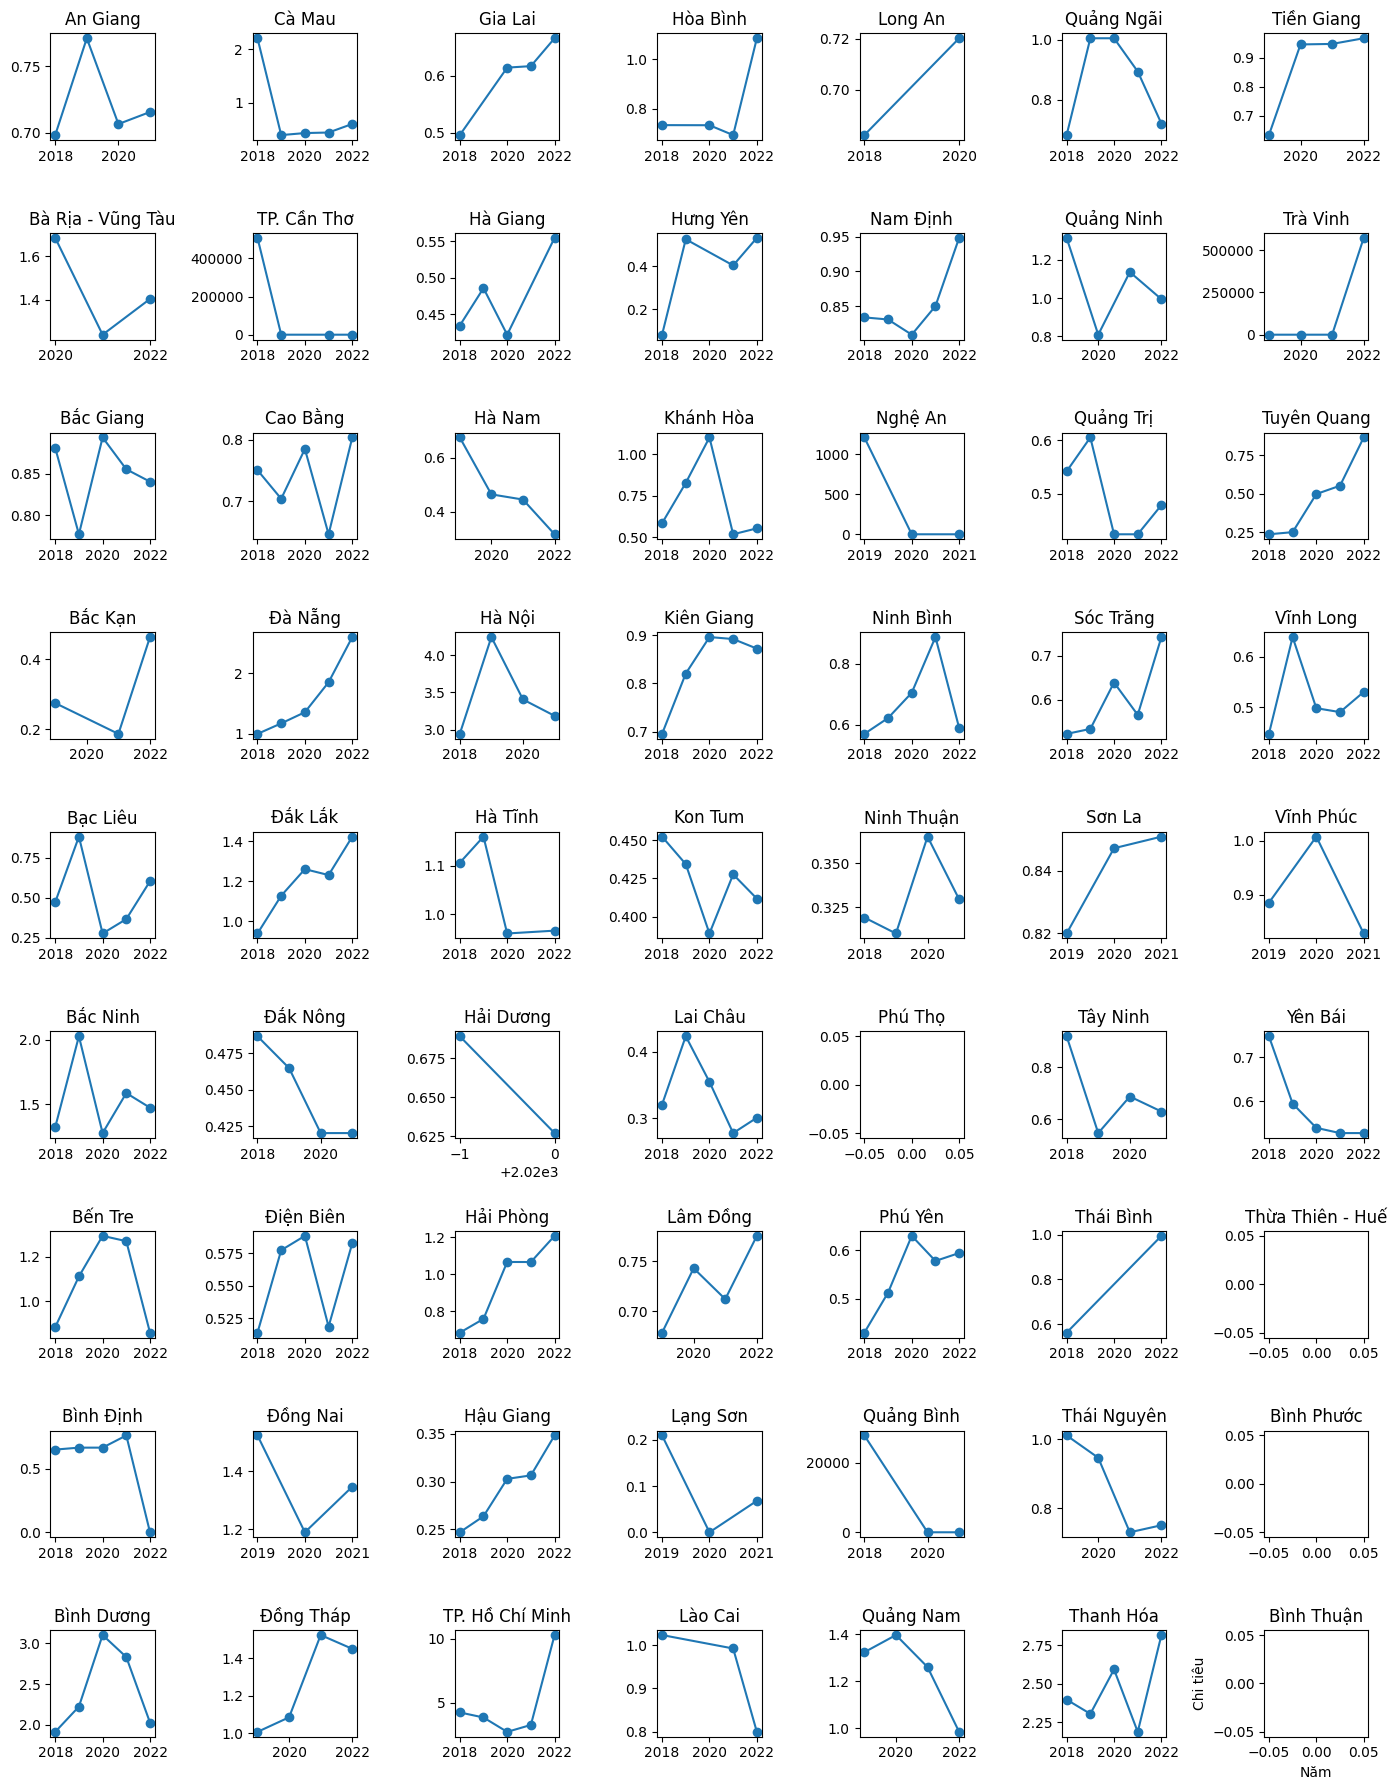

In [23]:
fig, axs = plt.subplots(9, 7, figsize=(14, 18))
i = 0
j = 0
for loc in data['Địa phương'].unique():
    temp = data[data['Địa phương'] == loc].dropna()
    axs[i, j].set_title(loc)
    # Tạo biểu đồ phân tán
    axs[i, j].scatter(temp['Năm'].astype(int), temp['Chi tiêu cho giáo dục'])
    axs[i, j].plot(temp['Năm'].astype(int), temp['Chi tiêu cho giáo dục'])
    
    # Đặt tên cho trục x và y
    plt.xlabel('Năm')
    plt.ylabel('Chi tiêu')
    if i == 8:
        i = 0
        j += 1
    else:
        i += 1

plt.tight_layout(h_pad=2.)
# Hiển thị biểu đồ
plt.show()


### Xử lí các điểm dữ liệu bất hợp lý

#### Cần Thơ

In [24]:
data[data['Địa phương'] == 'TP. Cần Thơ']

,Địa phương,Năm,Chi tiêu cho giáo dục
50,TP. Cần Thơ,2018,507966.492000
51,TP. Cần Thơ,2019,0.768531
52,TP. Cần Thơ,2020,NaN
53,TP. Cần Thơ,2021,0.632888
54,TP. Cần Thơ,2022,0.770923


In [25]:
data['Chi tiêu cho giáo dục'].loc[50] = data['Chi tiêu cho giáo dục'].loc[50] / 1000000

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24940\1454072819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Chi tiêu cho giáo dục'].loc[50] = data['Chi tiêu cho giáo dục'].loc[50] / 1000000


#### Trà Vinh

In [26]:
data[data['Địa phương'] == 'Trà Vinh']

,Địa phương,Năm,Chi tiêu cho giáo dục
275,Trà Vinh,2018,NaN
276,Trà Vinh,2019,0.770248
277,Trà Vinh,2020,0.671181
278,Trà Vinh,2021,0.623709
279,Trà Vinh,2022,572624.000000


In [27]:
data['Chi tiêu cho giáo dục'].loc[279] = data['Chi tiêu cho giáo dục'].loc[279] / 1000000

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24940\2050218910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Chi tiêu cho giáo dục'].loc[279] = data['Chi tiêu cho giáo dục'].loc[279] / 1000000


In [28]:
data[data['Địa phương'] == 'Trà Vinh']

,Địa phương,Năm,Chi tiêu cho giáo dục
275,Trà Vinh,2018,NaN
276,Trà Vinh,2019,0.770248
277,Trà Vinh,2020,0.671181
278,Trà Vinh,2021,0.623709
279,Trà Vinh,2022,0.572624


#### Quảng Bình

In [29]:
data[data['Địa phương'] == 'Quảng Bình']

,Địa phương,Năm,Chi tiêu cho giáo dục
215,Quảng Bình,2018,27806.000000
216,Quảng Bình,2019,NaN
217,Quảng Bình,2020,0.772024
218,Quảng Bình,2021,0.692123
219,Quảng Bình,2022,NaN


In [30]:
data['Chi tiêu cho giáo dục'].loc[215] = data['Chi tiêu cho giáo dục'].loc[215] / 1000000

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24940\3015950434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Chi tiêu cho giáo dục'].loc[215] = data['Chi tiêu cho giáo dục'].loc[215] / 1000000


In [31]:
data[data['Địa phương'] == 'Quảng Bình']

,Địa phương,Năm,Chi tiêu cho giáo dục
215,Quảng Bình,2018,0.027806
216,Quảng Bình,2019,NaN
217,Quảng Bình,2020,0.772024
218,Quảng Bình,2021,0.692123
219,Quảng Bình,2022,NaN


#### Nghệ An

In [32]:
data[data['Địa phương'] == 'Nghệ An']

,Địa phương,Năm,Chi tiêu cho giáo dục
190,Nghệ An,2018,NaN
191,Nghệ An,2019,1213.115000
192,Nghệ An,2020,1.205852
193,Nghệ An,2021,1.125529
194,Nghệ An,2022,NaN


In [33]:
data['Chi tiêu cho giáo dục'].loc[191] = data['Chi tiêu cho giáo dục'].loc[191] / 1000

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24940\1015249910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Chi tiêu cho giáo dục'].loc[191] = data['Chi tiêu cho giáo dục'].loc[191] / 1000


In [34]:
data[data['Địa phương'] == 'Nghệ An']

,Địa phương,Năm,Chi tiêu cho giáo dục
190,Nghệ An,2018,NaN
191,Nghệ An,2019,1.213115
192,Nghệ An,2020,1.205852
193,Nghệ An,2021,1.125529
194,Nghệ An,2022,NaN


#### Vẽ lại biểu đồ các tỉnh có dữ liệu bất hợp lý

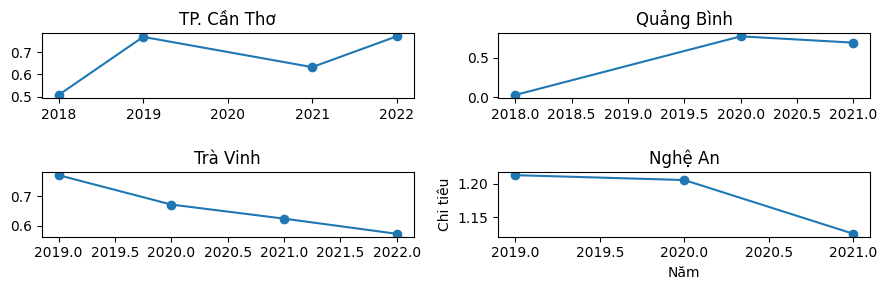

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(9, 3))
i = 0
j = 0
for loc in ['TP. Cần Thơ', 'Trà Vinh', 'Quảng Bình', 'Nghệ An']:
    temp = data[data['Địa phương'] == loc].dropna()
    axs[i, j].set_title(loc)
    # Tạo biểu đồ phân tán
    axs[i, j].scatter(temp['Năm'].astype(int), temp['Chi tiêu cho giáo dục'])
    axs[i, j].plot(temp['Năm'].astype(int), temp['Chi tiêu cho giáo dục'])
    
    # Đặt tên cho trục x và y
    plt.xlabel('Năm')
    plt.ylabel('Chi tiêu')
    if i == 1:
        i = 0
        j += 1
    else:
        i += 1

plt.tight_layout(h_pad=2.)
# Hiển thị biểu đồ
plt.show()


In [36]:
data[data['Chi tiêu cho giáo dục'] == data['Chi tiêu cho giáo dục'].max()]

,Địa phương,Năm,Chi tiêu cho giáo dục
134,TP. Hồ Chí Minh,2022,10.30881


In [37]:
data[data['Chi tiêu cho giáo dục'] == data['Chi tiêu cho giáo dục'].min()]

,Địa phương,Năm,Chi tiêu cho giáo dục
39,Bình Định,2022,0.000001
172,Lạng Sơn,2020,0.000001


### Thay thế các dữ liệu Nan bằng giá trị trung bình theo từng tỉnh

In [38]:
for loc in data['Địa phương'].unique():
    mean_value = data.loc[data['Địa phương'] == loc, 'Chi tiêu cho giáo dục'].mean()
    data.loc[data['Địa phương'] == loc, 'Chi tiêu cho giáo dục'] = data.loc[data['Địa phương'] == loc, 'Chi tiêu cho giáo dục'].fillna(mean_value)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 0 to 314
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Địa phương             315 non-null    object 
 1   Năm                    315 non-null    int64  
 2   Chi tiêu cho giáo dục  295 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.9+ KB


In [40]:
data[data['Chi tiêu cho giáo dục'].isna()]

,Địa phương,Năm,Chi tiêu cho giáo dục
205,Phú Thọ,2018,NaN
206,Phú Thọ,2019,NaN
207,Phú Thọ,2020,NaN
208,Phú Thọ,2021,NaN
209,Phú Thọ,2022,NaN
300,Thừa Thiên - Huế,2018,NaN
301,Thừa Thiên - Huế,2019,NaN
302,Thừa Thiên - Huế,2020,NaN
303,Thừa Thiên - Huế,2021,NaN
304,Thừa Thiên - Huế,2022,NaN


### Loại bỏ tất cả các tỉnh không có dữ liệu

In [41]:
data.dropna(inplace=True)

In [42]:
data[data['Chi tiêu cho giáo dục'].isna()].shape[0]

0

In [43]:
data.to_csv('clean_education_data.csv', index=False)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


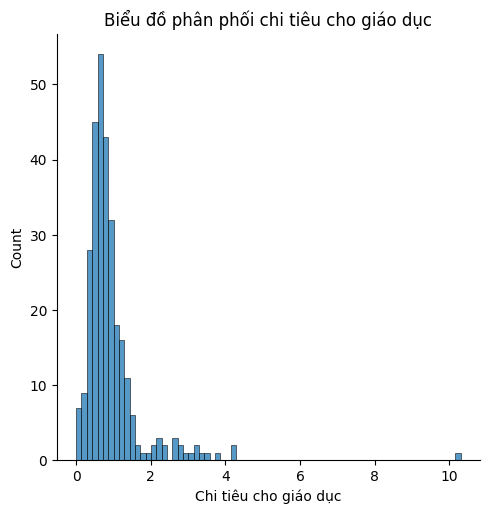

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for flipper length
sns.displot(data, x="Chi tiêu cho giáo dục")
plt.title("Biểu đồ phân phối chi tiêu cho giáo dục")
plt.show()


#### Hiển thị Boxplot của toàn bộ dữ liệu

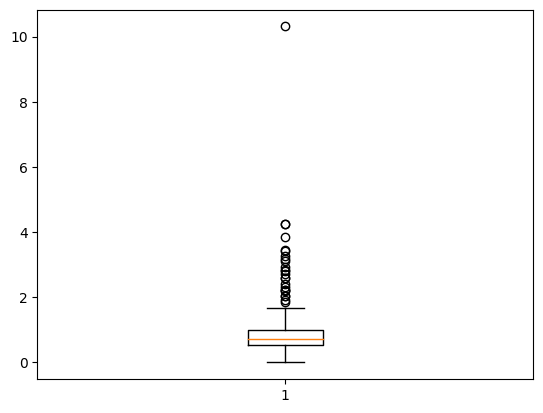

In [45]:
plt.boxplot(data["Chi tiêu cho giáo dục"])
plt.show()

#### Hiển thị Boxplot của toàn bộ dữ liệu có chỉ tiêu cho giáo dục nhỏ hơn hoặc bằng 1.5

In [46]:
# Tính IQR của một cột trong DataFrame
quartiles = data['Chi tiêu cho giáo dục'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
iqr

0.48098150000000006

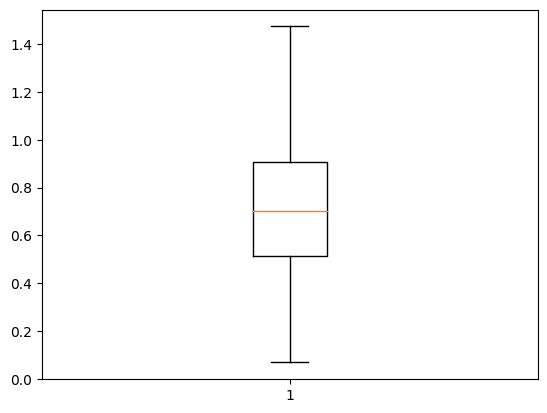

In [47]:
plt.boxplot(data["Chi tiêu cho giáo dục"][data["Chi tiêu cho giáo dục"] <= quartiles[0.75] + iqr][data["Chi tiêu cho giáo dục"] >= quartiles[0.25] - iqr])
plt.show()

In [48]:
data[data["Chi tiêu cho giáo dục"] > quartiles[0.75] + iqr]

,Địa phương,Năm,Chi tiêu cho giáo dục
7,Bà Rịa - Vũng Tàu,2020,1.685634
26,Bắc Ninh,2019,2.027226
28,Bắc Ninh,2021,1.586982
40,Bình Dương,2018,1.912319
41,Bình Dương,2019,2.223083
42,Bình Dương,2020,3.103078
43,Bình Dương,2021,2.832295
44,Bình Dương,2022,2.026742
45,Cà Mau,2018,2.211146
63,Đà Nẵng,2021,1.849277


In [49]:
data[data["Chi tiêu cho giáo dục"] > quartiles[0.75] + iqr].min()

Địa phương               Bà Rịa - Vũng Tàu
Năm                                   2018
Chi tiêu cho giáo dục             1.522966
dtype: object

In [50]:
data[data["Chi tiêu cho giáo dục"] < quartiles[0.25] - iqr]

,Địa phương,Năm,Chi tiêu cho giáo dục
39,Bình Định,2022,0.000001
172,Lạng Sơn,2020,0.000001
215,Quảng Bình,2018,0.027806


In [51]:
data[data["Chi tiêu cho giáo dục"] < quartiles[0.25] - iqr].max()

Địa phương               Quảng Bình
Năm                            2022
Chi tiêu cho giáo dục      0.027806
dtype: object

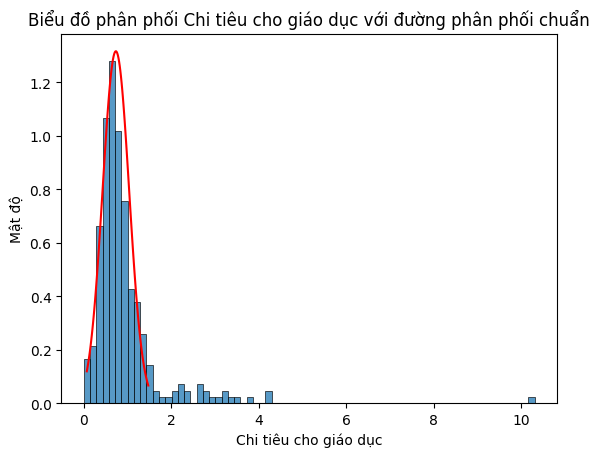

In [52]:
mean = data["Chi tiêu cho giáo dục"][data["Chi tiêu cho giáo dục"] <= quartiles[0.75] + iqr][data["Chi tiêu cho giáo dục"] >= quartiles[0.25] - iqr].mean()
std = data["Chi tiêu cho giáo dục"][data["Chi tiêu cho giáo dục"] <= quartiles[0.75] + iqr][data["Chi tiêu cho giáo dục"] >= quartiles[0.25] - iqr].std()


sns.histplot(data, x="Chi tiêu cho giáo dục", kde=False, stat="density")

x_values = np.linspace(data["Chi tiêu cho giáo dục"][data["Chi tiêu cho giáo dục"] <= quartiles[0.75] + iqr][data["Chi tiêu cho giáo dục"] >= quartiles[0.25] - iqr].min(), 
                       data["Chi tiêu cho giáo dục"][data["Chi tiêu cho giáo dục"] <= quartiles[0.75] + iqr][data["Chi tiêu cho giáo dục"] >= quartiles[0.25] - iqr].max(), 100)

pdf = norm.pdf(x_values, mean, std)

plt.plot(x_values, pdf, color='red')

plt.title("Biểu đồ phân phối Chi tiêu cho giáo dục với đường phân phối chuẩn")
plt.xlabel("Chi tiêu cho giáo dục")
plt.ylabel("Mật độ")

# Hiển thị biểu đồ
plt.show()

## 2. Dữ liệu 6 vùng kinh tế

In [53]:
VKT_FILE_PATH = '../DATA/RAW DATA/6 vùng kinh tế/regions_data.csv'

### Đọc dữ liệu

In [54]:
df = pd.read_csv(VKT_FILE_PATH, encoding='utf-8')
df.head(5)

,Vùng kinh tế - Xã hội,Địa phương
0,Vùng trung du và miền núi phía Bắc,Hà Giang
1,Vùng trung du và miền núi phía Bắc,Cao Bằng
2,Vùng trung du và miền núi phía Bắc,Lạng Sơn
3,Vùng trung du và miền núi phía Bắc,Bắc Giang
4,Vùng trung du và miền núi phía Bắc,Phú Thọ


In [55]:
df['Vùng kinh tế - Xã hội'].unique()

array(['Vùng trung du và miền núi phía Bắc', 'Vùng đồng bằng sông Hồng',
       'Vùng Bắc Trung Bộ và duyên hải miền Trung', 'Vùng Tây Nguyên',
       'Vùng Đông Nam Bộ', 'Vùng đồng bằng sông Cửu Long'], dtype=object)

In [56]:
province_df = pd.DataFrame(df['Địa phương'], columns=['Địa phương'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['Địa phương']])

In [57]:
province_df[province_df['exact'] == False]

,Địa phương,exact
12,Điện Biên và Hòa Bình.,False
22,Ninh Bình và Quảng Ninh.,False
35,Ninh Thuận và Bình Thuận.,False
39,Đắk Nông và Lâm Đồng.,False
40,thành phố Hồ Chí Minh,False
45,Tây Ninh.,False
46,thành phố Cần Thơ,False
57,Bạc Liêu và Cà Mau.,False


### Xóa dấu chấm câu

In [58]:
df['Địa phương'] = df['Địa phương'].str.rstrip('.')

#### Thay thế từ "thành phố" thành "TP."

In [59]:
df['Địa phương'] = df['Địa phương'].str.replace('thành phố', 'TP.')

In [60]:
province_df = pd.DataFrame(df['Địa phương'], columns=['Địa phương'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['Địa phương']])
province_df[province_df['exact'] == False]

,Địa phương,exact
12,Điện Biên và Hòa Bình,False
22,Ninh Bình và Quảng Ninh,False
35,Ninh Thuận và Bình Thuận,False
39,Đắk Nông và Lâm Đồng,False
57,Bạc Liêu và Cà Mau,False


### Chia các địa phương có chữ và thành 2 địa phương riêng biệt

In [61]:
for province in df[df['Địa phương'].str.contains(' và ')]['Địa phương']:
    print(province)
    df = pd.concat([df, pd.DataFrame([{'Vùng kinh tế - Xã hội': df['Vùng kinh tế - Xã hội'][df['Địa phương'] == province].iloc[0], 'Địa phương': p} for p in province.split(' và ')])])

Điện Biên và Hòa Bình
Ninh Bình và Quảng Ninh
Ninh Thuận và Bình Thuận
Đắk Nông và Lâm Đồng
Bạc Liêu và Cà Mau


In [62]:
df[df['Địa phương'].str.contains(' và ')].index

Index([12, 22, 35, 39, 57], dtype='int64')

In [63]:
df.drop(df[df['Địa phương'].str.contains(' và ')].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.to_csv('clean_regions_data.csv', index=False)

## 3. Chỉ số giáo dục

In [64]:
CSGD_FILE_PATH = r'..\DATA\RAW DATA\Chỉ số giáo dục [2018-2020]\Thống kê chỉ số giai đoạn 2018 - 2020 - 12. Chỉ số giáo dục của cả nước và các địa phương giai đoạn 2018 - 2020.csv'

### Đọc dữ liệu

In [65]:
data = pd.read_csv(CSGD_FILE_PATH, encoding='utf-8')

In [66]:
data.head(5)

,Địa phương,2018,2019,2020
0,Hà Nội,"0,787","0,79","0,783"
1,Vĩnh Phúc,"0,653","0,675","0,678"
2,Bắc Ninh,"0,668","0,673","0,683"
3,Quảng Ninh,"0,683","0,696","0,681"
4,Hải Dương,"0,672","0,676","0,688"


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Địa phương  63 non-null     object
 1   2018        63 non-null     object
 2   2019        63 non-null     object
 3   2020        63 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [68]:
data.describe()

,Địa phương,2018,2019,2020
count,63,63,63,63
unique,63,56,57,59
top,Hà Nội,"0,624","0,538","0,546"
freq,1,2,2,2


### Kiểm tra tên Địa phương

In [69]:
province_df = pd.DataFrame(data['Địa phương'], columns=['Địa phương'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['Địa phương']])
province_df[province_df['exact'] == False]

,Địa phương,exact
58,Cần Thơ,False


In [70]:
data['Địa phương'] = data['Địa phương'].str.replace('Cần Thơ', 'TP. Cần Thơ')
data['Địa phương'] = data['Địa phương'].str.replace('Hòa Bình', 'Hoà Bình')

In [71]:
province_df = pd.DataFrame(data['Địa phương'], columns=['Địa phương'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['Địa phương']])
province_df[province_df['exact'] == False]

,Địa phương,exact


### Chuyển về bảng dữ liệu bao gồm Địa phương, Năm và Giá trị

In [72]:
data['2018'] = data['2018'].str.replace(',', '').astype(float)
data['2019'] = data['2019'].str.replace(',', '').astype(float)
data['2020'] = data['2020'].str.replace(',', '').astype(float)

In [73]:
new_data = []
for province in data['Địa phương']:
    new_data.extend([{'Địa phương': province, 'Năm':year, 'Giá trị': data[data['Địa phương']==province][f'{year}'].iloc[0]} for year in [2018, 2019, 2020]])

In [74]:
df = pd.DataFrame(new_data)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Địa phương  189 non-null    object 
 1   Năm         189 non-null    int64  
 2   Giá trị     189 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.6+ KB


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


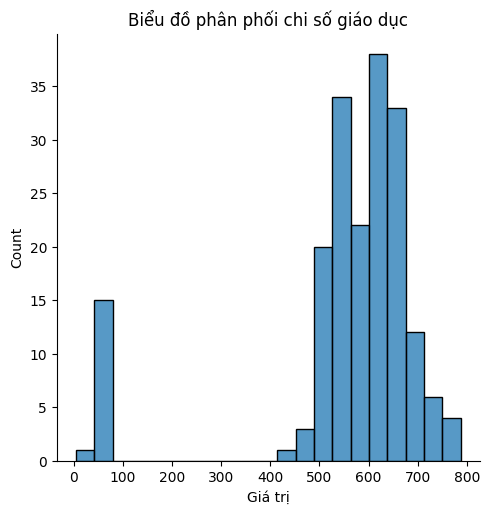

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for flipper length
sns.displot(df, x="Giá trị")
plt.title("Biểu đồ phân phối chi số giáo dục")
plt.show()

#### Hiển thị Boxplot của toàn bộ dữ liệu

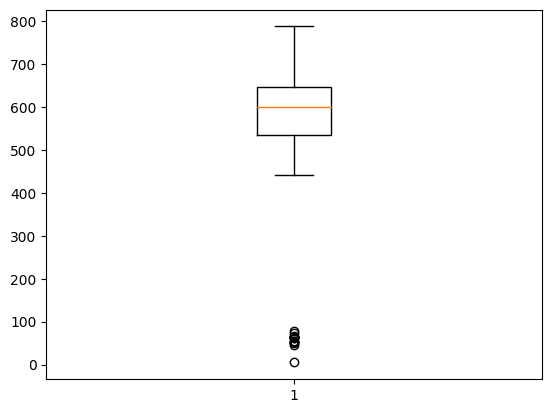

In [77]:
plt.boxplot(df["Giá trị"])
plt.show()

#### Hiển thị Boxplot của toàn bộ dữ liệu có chỉ tiêu cho giáo dục

In [78]:
# Tính IQR của một cột trong DataFrame
quartiles = df['Giá trị'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
iqr

110.0

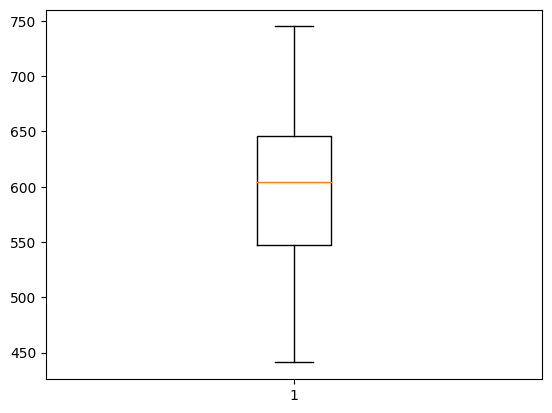

In [79]:
plt.boxplot(df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr])
plt.show()

In [80]:
df[df["Giá trị"] > quartiles[0.75] + iqr]

,Địa phương,Năm,Giá trị
0,Hà Nội,2018,787.0
2,Hà Nội,2020,783.0
94,Đà Nẵng,2019,775.0
95,Đà Nẵng,2020,763.0


In [81]:
df[df["Giá trị"] > quartiles[0.75] + iqr].min()

Địa phương    Hà Nội
Năm             2018
Giá trị        763.0
dtype: object

In [82]:
df[df["Giá trị"] < quartiles[0.25] - iqr]

,Địa phương,Năm,Giá trị
1,Hà Nội,2019,79.0
21,Thái Bình,2018,65.0
23,Thái Bình,2020,67.0
35,Hà Giang,2020,5.0
53,Lai Châu,2020,45.0
62,Hoà Bình,2020,63.0
71,Bắc Giang,2020,65.0
88,Quảng Trị,2019,62.0
91,Thừa Thiên - Huế,2019,65.0
112,Ninh Thuận,2019,53.0


In [83]:
df[df["Giá trị"] < quartiles[0.25] - iqr].max()

Địa phương    Thừa Thiên - Huế
Năm                       2020
Giá trị                   79.0
dtype: object

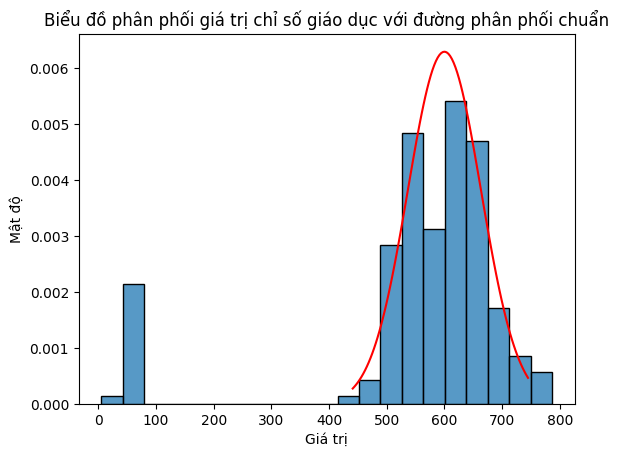

In [84]:
mean = df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].mean()
std = df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].std()


sns.histplot(df, x="Giá trị", kde=False, stat="density")

x_values = np.linspace(df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].min(), 
                       df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].max(), 100)

pdf = norm.pdf(x_values, mean, std)

plt.plot(x_values, pdf, color='red')

plt.title("Biểu đồ phân phối giá trị chỉ số giáo dục với đường phân phối chuẩn")
plt.xlabel("Giá trị")
plt.ylabel("Mật độ")

# Hiển thị biểu đồ
plt.show()

## 4. Chỉ số phát triển con người

In [89]:
PTCN_FILE_PATH = r'D:\Code\BachKhoa\Khoa Hoc Du Lieu\university-score-predictor\DATA\RAW DATA\Chỉ số phát triển con người [2018-2020]\Thống kê chỉ số giai đoạn 2018 - 2020 - 1. Chỉ số phát triển con người của cả nước và các địa phương giai đoạn 2018 - 2020.csv'

### Đọc dữ liệu

In [90]:
data = pd.read_csv(PTCN_FILE_PATH, encoding='utf-8')

In [91]:
data.head(5)

,Địa phương,2018,2019,2020
0,Hà Nội,"0,794","0,799","0,799"
1,Vĩnh Phúc,"0,736","0,749","0,751"
2,Bắc Ninh,"0,762","0,764","0,768"
3,Quảng Ninh,"0,757","0,769","0,769"
4,Hải Dương,"0,723","0,728","0,735"


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Địa phương  63 non-null     object
 1   2018        63 non-null     object
 2   2019        63 non-null     object
 3   2020        63 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [94]:
data.describe()

,Địa phương,2018,2019,2020
count,63,63,63,63
unique,63,54,52,57
top,Hà Nội,"0,691","0,681","0,702"
freq,1,3,3,2


### Kiểm tra tên Địa phương

In [95]:
province_df = pd.DataFrame(data['Địa phương'], columns=['Địa phương'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['Địa phương']])
province_df[province_df['exact'] == False]

,Địa phương,exact
48,Bà Rịa - Vũng Tàu (***),False
58,Cần Thơ,False


In [96]:
data['Địa phương'] = data['Địa phương'].str.replace('Cần Thơ', 'TP. Cần Thơ')
data['Địa phương'] = data['Địa phương'].str.replace('Bà Rịa - Vũng Tàu (***)', 'Bà Rịa - Vũng Tàu')

In [97]:
province_df = pd.DataFrame(data['Địa phương'], columns=['Địa phương'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['Địa phương']])
province_df[province_df['exact'] == False]

,Địa phương,exact


### Chuyển về bảng dữ liệu bao gồm Địa phương, Năm và Giá trị

In [98]:
data['2018'] = data['2018'].str.replace(',', '').astype(float)
data['2019'] = data['2019'].str.replace(',', '').astype(float)
data['2020'] = data['2020'].str.replace(',', '').astype(float)

In [99]:
new_data = []
for province in data['Địa phương']:
    new_data.extend([{'Địa phương': province, 'Năm':year, 'Giá trị': data[data['Địa phương']==province][f'{year}'].iloc[0]} for year in [2018, 2019, 2020]])

In [100]:
df = pd.DataFrame(new_data)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Địa phương  189 non-null    object 
 1   Năm         189 non-null    int64  
 2   Giá trị     189 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.6+ KB


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


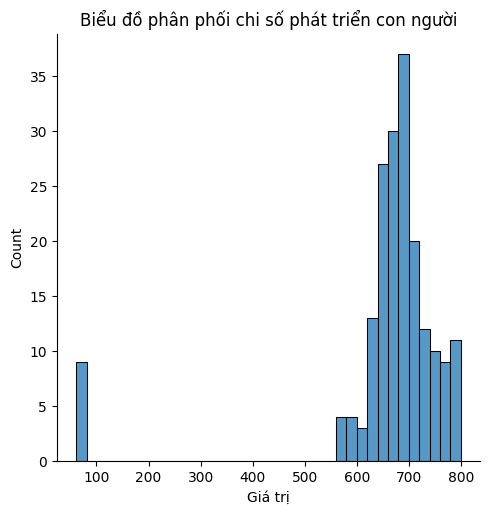

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for flipper length
sns.displot(df, x="Giá trị")
plt.title("Biểu đồ phân phối chi số phát triển con người")
plt.show()

#### Hiển thị Boxplot của toàn bộ dữ liệu

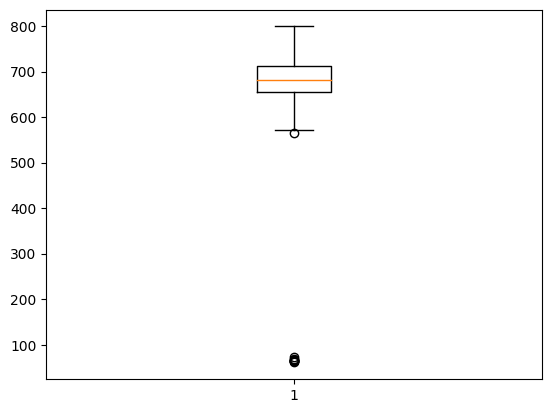

In [103]:
plt.boxplot(df["Giá trị"])
plt.show()

#### Hiển thị Boxplot của toàn bộ dữ liệu có chỉ tiêu cho giáo dục nhỏ hơn hoặc bằng 3rd Quanvle + 1.5*IQR và lớn hơn 1st hoặc bằng Quanvle - 1.5*IQR

In [104]:
# Tính IQR của một cột trong DataFrame
quartiles = df['Giá trị'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
iqr

58.0

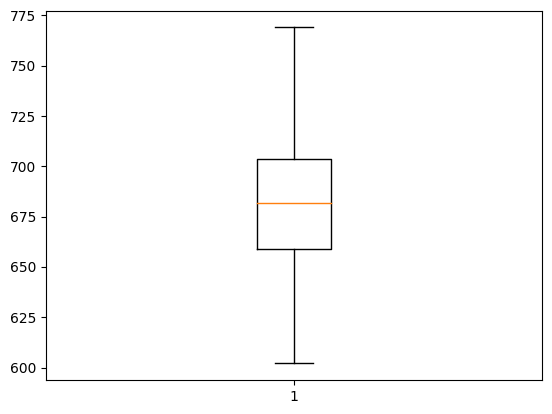

In [105]:
plt.boxplot(df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr])
plt.show()

In [106]:
df[df["Giá trị"] > quartiles[0.75] + iqr]

,Địa phương,Năm,Giá trị
0,Hà Nội,2018,794.0
1,Hà Nội,2019,799.0
2,Hà Nội,2020,799.0
16,Hải Phòng,2019,777.0
17,Hải Phòng,2020,782.0
93,Đà Nẵng,2018,773.0
94,Đà Nẵng,2019,788.0
95,Đà Nẵng,2020,779.0
144,Bà Rịa - Vũng Tàu,2018,789.0
145,Bà Rịa - Vũng Tàu,2019,799.0


In [107]:
df[df["Giá trị"] > quartiles[0.75] + iqr].min()

Địa phương    Bà Rịa - Vũng Tàu
Năm                        2018
Giá trị                   773.0
dtype: object

In [108]:
df[df["Giá trị"] < quartiles[0.25] - iqr]

,Địa phương,Năm,Giá trị
33,Hà Giang,2018,565.0
34,Hà Giang,2019,579.0
35,Hà Giang,2020,591.0
42,Tuyên Quang,2018,66.0
48,Điện Biên,2018,588.0
49,Điện Biên,2019,589.0
51,Lai Châu,2018,571.0
52,Lai Châu,2019,576.0
53,Lai Châu,2020,582.0
86,Quảng Bình,2020,69.0


In [109]:
df[df["Giá trị"] < quartiles[0.25] - iqr].max()

Địa phương    Đồng Tháp
Năm                2020
Giá trị           591.0
dtype: object

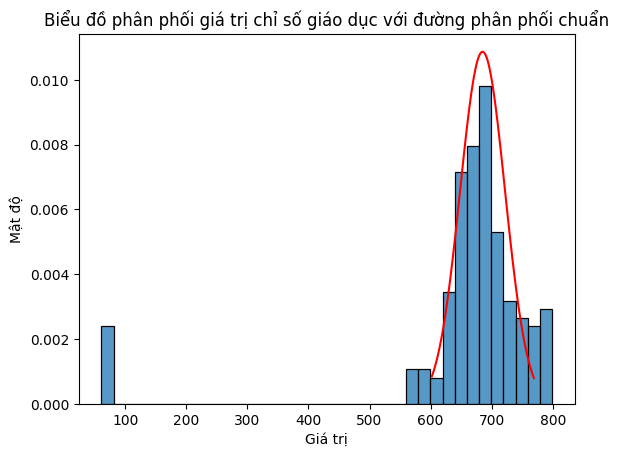

In [110]:
mean = df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].mean()
std = df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].std()


sns.histplot(df, x="Giá trị", kde=False, stat="density")

x_values = np.linspace(df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].min(), 
                       df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].max(), 100)

pdf = norm.pdf(x_values, mean, std)

plt.plot(x_values, pdf, color='red')

plt.title("Biểu đồ phân phối giá trị chỉ số giáo dục với đường phân phối chuẩn")
plt.xlabel("Giá trị")
plt.ylabel("Mật độ")

# Hiển thị biểu đồ
plt.show()

## 5. Chỉ số sức khỏe

In [111]:
CSGD_FILE_PATH = r'..\DATA\RAW DATA\Chỉ số sức khỏe [2018-2020]\Thống kê chỉ số giai đoạn 2018 - 2020 - 6. Chỉ số sức khỏe của cả nước và các địa phương giai đoạn 2018 - 2020.csv'

### Đọc dữ liệu

In [112]:
data = pd.read_csv(CSGD_FILE_PATH, encoding='utf-8')

In [113]:
data.head(5)

,Địa phương,2018,2019,2020
0,Hà Nội,"0,852","0,854","0,853"
1,Vĩnh Phúc,"0,834","0,835","0,831"
2,Bắc Ninh,"0,835","0,835","0,832"
3,Quảng Ninh,"0,822","0,823","0,822"
4,Hải Dương,"0,842","0,843","0,843"


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Địa phương  63 non-null     object
 1   2018        63 non-null     object
 2   2019        63 non-null     object
 3   2020        63 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [115]:
data.describe()

,Địa phương,2018,2019,2020
count,63,63,63,63
unique,63,41,45,45
top,Hà Nội,"0,822","0,823","0,842"
freq,1,4,4,5


### Kiểm tra tên Địa phương

In [116]:
province_df = pd.DataFrame(data['Địa phương'], columns=['Địa phương'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['Địa phương']])
province_df[province_df['exact'] == False]

,Địa phương,exact
58,Cần Thơ,False


In [117]:
data['Địa phương'] = data['Địa phương'].str.replace('Cần Thơ', 'TP. Cần Thơ')
data['Địa phương'] = data['Địa phương'].str.replace('Hòa Bình', 'Hoà Bình')

In [118]:
province_df = pd.DataFrame(data['Địa phương'], columns=['Địa phương'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['Địa phương']])
province_df[province_df['exact'] == False]

,Địa phương,exact


### Chuyển về bảng dữ liệu bao gồm Địa phương, Năm và Giá trị

In [119]:
data['2018'] = data['2018'].str.replace(',', '').astype(float)
data['2019'] = data['2019'].str.replace(',', '').astype(float)
data['2020'] = data['2020'].str.replace(',', '').astype(float)

In [120]:
new_data = []
for province in data['Địa phương']:
    new_data.extend([{'Địa phương': province, 'Năm':year, 'Giá trị': data[data['Địa phương']==province][f'{year}'].iloc[0]} for year in [2018, 2019, 2020]])

In [121]:
df = pd.DataFrame(new_data)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Địa phương  189 non-null    object 
 1   Năm         189 non-null    int64  
 2   Giá trị     189 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.6+ KB


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


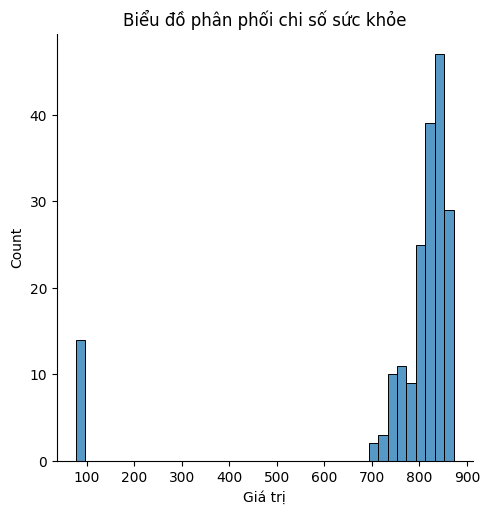

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for flipper length
sns.displot(df, x="Giá trị")
plt.title("Biểu đồ phân phối chi số sức khỏe")
plt.show()

#### Hiển thị Boxplot của toàn bộ dữ liệu

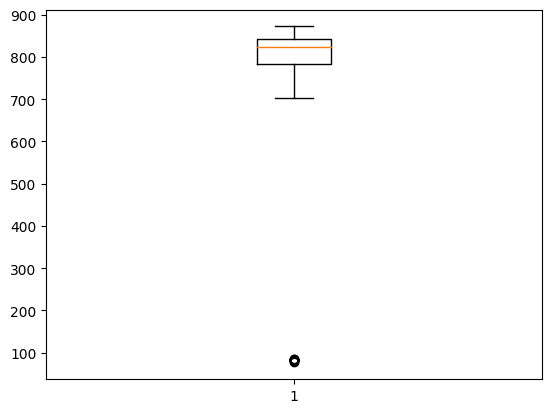

In [124]:
plt.boxplot(df["Giá trị"])
plt.show()

#### Hiển thị Boxplot của toàn bộ dữ liệu có chỉ tiêu cho giáo dục nhỏ hơn hoặc bằng 3rd Quanvle + 1.5*IQR và lớn hơn 1st Quanvle - 1.5*IQR

In [125]:
# Tính IQR của một cột trong DataFrame
quartiles = df['Giá trị'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
iqr

58.0

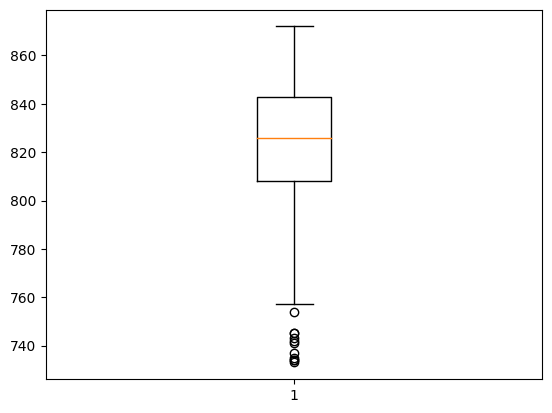

In [126]:
plt.boxplot(df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr])
plt.show()

In [127]:
df[df["Giá trị"] > quartiles[0.75] + iqr]

,Địa phương,Năm,Giá trị


In [128]:
df[df["Giá trị"] > quartiles[0.75] + iqr].min()

Địa phương    NaN
Năm           NaN
Giá trị       NaN
dtype: object

In [129]:
df[df["Giá trị"] < quartiles[0.25] - iqr]

,Địa phương,Năm,Giá trị
15,Hải Phòng,2018,84.0
19,Hưng Yên,2019,84.0
24,Hà Nam,2018,84.0
51,Lai Châu,2018,703.0
52,Lai Châu,2019,705.0
53,Lai Châu,2020,718.0
69,Bắc Giang,2018,82.0
75,Thanh Hóa,2018,82.0
76,Thanh Hóa,2019,82.0
86,Quảng Bình,2020,81.0


In [130]:
df[df["Giá trị"] < quartiles[0.25] - iqr].max()

Địa phương    Trà Vinh
Năm               2020
Giá trị          718.0
dtype: object

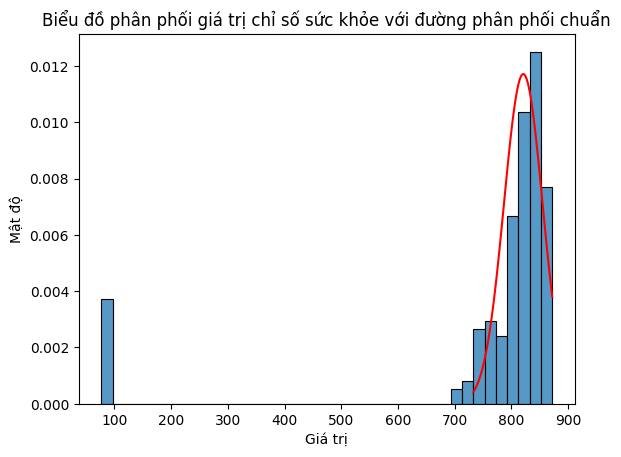

In [131]:
mean = df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].mean()
std = df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].std()


sns.histplot(df, x="Giá trị", kde=False, stat="density")

x_values = np.linspace(df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].min(), 
                       df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].max(), 100)

pdf = norm.pdf(x_values, mean, std)

plt.plot(x_values, pdf, color='red')

plt.title("Biểu đồ phân phối giá trị chỉ số sức khỏe với đường phân phối chuẩn")
plt.xlabel("Giá trị")
plt.ylabel("Mật độ")

# Hiển thị biểu đồ
plt.show()

## 6. Chỉ số thu nhập

In [132]:
TN_FILE_PATH = r'..\DATA\RAW DATA\Chỉ số thu nhập [2018-2020]\Thống kê chỉ số giai đoạn 2018 - 2020 - 16. Chỉ số thu nhập của cả nước và các địa phương giai đoạn 2018 - 2020.csv'

### Đọc dữ liệu

In [133]:
data = pd.read_csv(TN_FILE_PATH, encoding='utf-8')

In [134]:
data.head(5)

,Địa phương,2018,2019,2020
0,Hà Nội,"0,746","0,758","0,763"
1,Vĩnh Phúc,"0,733","0,744","0,753"
2,Bắc Ninh,"0,794","0,793","0,796"
3,Quảng Ninh,"0,772","0,794","0,811"
4,Hải Dương,"0,667","0,677","0,684"


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Địa phương  63 non-null     object
 1   2018        63 non-null     object
 2   2019        63 non-null     object
 3   2020        63 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [136]:
data.describe()

,Địa phương,2018,2019,2020
count,63,63,63,63
unique,63,53,57,55
top,Hà Nội,"0,59","0,65","0,763"
freq,1,3,3,2


### Kiểm tra tên Địa phương

In [137]:
province_df = pd.DataFrame(data['Địa phương'], columns=['Địa phương'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['Địa phương']])
province_df[province_df['exact'] == False]

,Địa phương,exact
58,Cần Thơ,False


In [138]:
data['Địa phương'] = data['Địa phương'].str.replace('Cần Thơ', 'TP. Cần Thơ')
data['Địa phương'] = data['Địa phương'].str.replace('Hòa Bình', 'Hoà Bình')

In [139]:
province_df = pd.DataFrame(data['Địa phương'], columns=['Địa phương'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['Địa phương']])
province_df[province_df['exact'] == False]

,Địa phương,exact


### Chuyển về bảng dữ liệu bao gồm Địa phương, Năm và Giá trị

In [140]:
data['2018'] = data['2018'].str.replace(',', '').astype(float)
data['2019'] = data['2019'].str.replace(',', '').astype(float)
data['2020'] = data['2020'].str.replace(',', '').astype(float)

In [141]:
new_data = []
for province in data['Địa phương']:
    new_data.extend([{'Địa phương': province, 'Năm':year, 'Giá trị': data[data['Địa phương']==province][f'{year}'].iloc[0]} for year in [2018, 2019, 2020]])

In [142]:
df = pd.DataFrame(new_data)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Địa phương  189 non-null    object 
 1   Năm         189 non-null    int64  
 2   Giá trị     189 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.6+ KB


### Chuẩn hóa giá trị bằng hàm logarit

In [144]:
df["Giá trị chuẩn hóa log"] = np.log(df["Giá trị"])

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


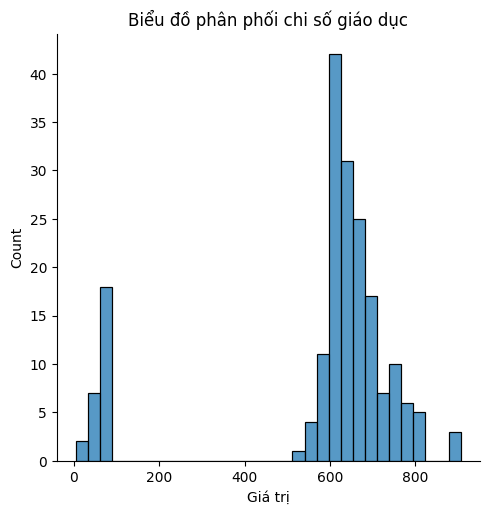

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for flipper length
sns.displot(df, x="Giá trị")
plt.title("Biểu đồ phân phối chi số giáo dục")
plt.show()

#### Hiển thị Boxplot của toàn bộ dữ liệu

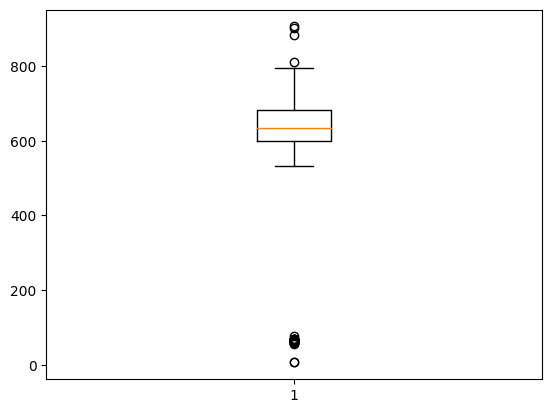

In [146]:
plt.boxplot(df["Giá trị"])
plt.show()

#### Hiển thị Boxplot của toàn bộ dữ liệu có chỉ tiêu cho giáo dục nhỏ hơn hoặc bằng 1.5

In [147]:
# Tính IQR của một cột trong DataFrame
quartiles = df['Giá trị'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
iqr

82.0

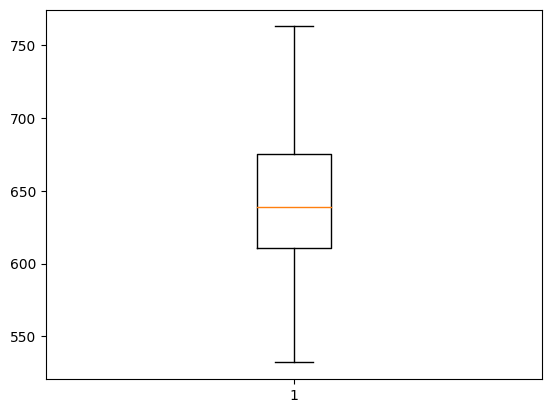

In [148]:
plt.boxplot(df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr])
plt.show()

In [149]:
df[df["Giá trị"] > quartiles[0.75] + iqr]

,Địa phương,Năm,Giá trị,Giá trị chuẩn hóa log
6,Bắc Ninh,2018,794.0,6.677083
7,Bắc Ninh,2019,793.0,6.675823
8,Bắc Ninh,2020,796.0,6.679599
9,Quảng Ninh,2018,772.0,6.648985
10,Quảng Ninh,2019,794.0,6.677083
11,Quảng Ninh,2020,811.0,6.698268
16,Hải Phòng,2019,765.0,6.639876
138,Bình Dương,2018,784.0,6.664409
139,Bình Dương,2019,796.0,6.679599
144,Bà Rịa - Vũng Tàu,2018,906.0,6.809039


In [150]:
df[df["Giá trị"] > quartiles[0.75] + iqr]

,Địa phương,Năm,Giá trị,Giá trị chuẩn hóa log
6,Bắc Ninh,2018,794.0,6.677083
7,Bắc Ninh,2019,793.0,6.675823
8,Bắc Ninh,2020,796.0,6.679599
9,Quảng Ninh,2018,772.0,6.648985
10,Quảng Ninh,2019,794.0,6.677083
11,Quảng Ninh,2020,811.0,6.698268
16,Hải Phòng,2019,765.0,6.639876
138,Bình Dương,2018,784.0,6.664409
139,Bình Dương,2019,796.0,6.679599
144,Bà Rịa - Vũng Tàu,2018,906.0,6.809039


In [151]:
df[df["Giá trị"] > quartiles[0.75] + iqr].min()

Địa phương               Bà Rịa - Vũng Tàu
Năm                                   2018
Giá trị                              765.0
Giá trị chuẩn hóa log             6.639876
dtype: object

In [152]:
df[df["Giá trị"] < quartiles[0.25] - iqr]

,Địa phương,Năm,Giá trị,Giá trị chuẩn hóa log
17,Hải Phòng,2020,78.0,4.356709
26,Hà Nam,2020,69.0,4.234107
36,Cao Bằng,2018,56.0,4.025352
37,Cao Bằng,2019,57.0,4.043051
61,Hoà Bình,2019,65.0,4.174387
66,Lạng Sơn,2018,59.0,4.077537
69,Bắc Giang,2018,64.0,4.158883
78,Nghệ An,2018,59.0,4.077537
79,Nghệ An,2019,6.0,1.791759
83,Hà Tĩnh,2020,67.0,4.204693


In [153]:
df[df["Giá trị"] < quartiles[0.25] - iqr].max()

Địa phương               Đắk Nông
Năm                          2020
Giá trị                      78.0
Giá trị chuẩn hóa log    4.356709
dtype: object

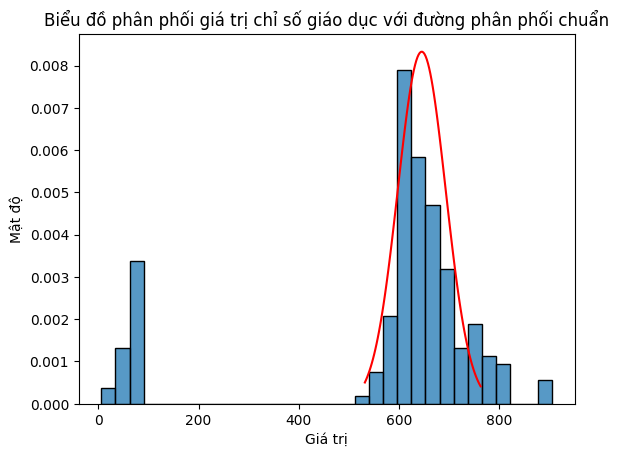

In [154]:
mean = df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].mean()
std = df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].std()


sns.histplot(df, x="Giá trị", kde=False, stat="density")

x_values = np.linspace(df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].min(), 
                       df["Giá trị"][df["Giá trị"] <= quartiles[0.75] + iqr][df["Giá trị"] >= quartiles[0.25] - iqr].max(), 100)

pdf = norm.pdf(x_values, mean, std)

plt.plot(x_values, pdf, color='red')

plt.title("Biểu đồ phân phối giá trị chỉ số giáo dục với đường phân phối chuẩn")
plt.xlabel("Giá trị")
plt.ylabel("Mật độ")

# Hiển thị biểu đồ
plt.show()

## 7. Dân số và mật độ dân số

In [155]:
CSGD_FILE_PATH = r'..\DATA\RAW DATA\Dân số và mật độ dân số [2018-2022]\Population_of_provinces.csv'

### Đọc dữ liệu

In [156]:
data = pd.read_csv(CSGD_FILE_PATH, encoding='utf-8')

In [157]:
data.head(5)

,Địa phương,Dân số trung bình (Nghìn người) 2018,Mật độ dân số (Người/km2) 2018,Dân số trung bình (Nghìn người) 2019,Mật độ dân số (Người/km2) 2019,Dân số trung bình (Nghìn người) 2020,Mật độ dân số (Người/km2) 2020,Dân số trung bình (Nghìn người) 2021,Mật độ dân số (Người/km2) 2021,Dân số trung bình (Nghìn người) 2022,Mật độ dân số (Người/km2) 2022
0,Hà Nội,"7.914,50","2.356,49","8.093,90","2.410,00","8.246,54","2.454,00","8.330,83","2.480,00","8.435,65","2.511,00"
1,Vĩnh Phúc,"1.138,40","921,63","1.154,80","934,00","1.171,20","948,00","1.191,78","964,00","1.197,62","969,00"
2,Bắc Ninh,"1.337,30","1.625,50","1.378,60","1.676,00","1.419,13","1.725,00","1.462,95","1.778,00","1.488,20","1.809,00"
3,Quảng Ninh,"1.303,90","211,05","1.324,80","214,00","1.337,61","216,00","1.350,85","218,00","1.362,88","220,00"
4,Hải Dương,"1.877,70","1.125,58","1.896,90","1.137,00","1.916,77","1.149,00","1.936,78","1.161,00","1.946,82","1.167,00"


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Địa phương                            63 non-null     object
 1   Dân số trung bình (Nghìn người) 2018  63 non-null     object
 2   Mật độ dân số (Người/km2) 2018        63 non-null     object
 3   Dân số trung bình (Nghìn người) 2019  63 non-null     object
 4   Mật độ dân số (Người/km2) 2019        63 non-null     object
 5   Dân số trung bình (Nghìn người) 2020  63 non-null     object
 6   Mật độ dân số (Người/km2) 2020        63 non-null     object
 7   Dân số trung bình (Nghìn người) 2021  63 non-null     object
 8   Mật độ dân số (Người/km2) 2021        63 non-null     object
 9   Dân số trung bình (Nghìn người) 2022  63 non-null     object
 10  Mật độ dân số (Người/km2) 2022        63 non-null     object
dtypes: object(11)
memory usage: 5.5+ K

In [159]:
data.describe()

,Địa phương,Dân số trung bình (Nghìn người) 2018,Mật độ dân số (Người/km2) 2018,Dân số trung bình (Nghìn người) 2019,Mật độ dân số (Người/km2) 2019,Dân số trung bình (Nghìn người) 2020,Mật độ dân số (Người/km2) 2020,Dân số trung bình (Nghìn người) 2021,Mật độ dân số (Người/km2) 2021,Dân số trung bình (Nghìn người) 2022,Mật độ dân số (Người/km2) 2022
count,63,63,63,63,63,63,63,63,63,63,63
unique,63,63,63,63,63,63,60,63,61,63,61
top,Hà Nội,"7.914,50","2.356,49","8.093,90","2.410,00","8.246,54","239,00","8.330,83","540,00","8.435,65","103,00"
freq,1,1,1,1,1,1,2,1,2,1,2


### Kiểm tra tên Địa phương

In [160]:
print(PROVINCE_NAMES)

['Hà Nội', 'Vĩnh Phúc', 'Bắc Ninh', 'Quảng Ninh', 'Hải Dương', 'Hải Phòng', 'Hưng Yên', 'Thái Bình', 'Hà Nam', 'Nam Định', 'Ninh Bình', 'Hà Giang', 'Cao Bằng', 'Bắc Kạn', 'Tuyên Quang', 'Lào Cai', 'Điện Biên', 'Lai Châu', 'Sơn La', 'Yên Bái', 'Hoà Bình', 'Thái Nguyên', 'Lạng Sơn', 'Bắc Giang', 'Phú Thọ', 'Thanh Hóa', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị', 'Thừa Thiên - Huế', 'Đà Nẵng', 'Quảng Nam', 'Quảng Ngãi', 'Bình Định', 'Phú Yên', 'Khánh Hòa', 'Ninh Thuận', 'Bình Thuận', 'Kon Tum', 'Gia Lai', 'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng', 'Bình Phước', 'Tây Ninh', 'Bình Dương', 'Đồng Nai', 'Bà Rịa - Vũng Tàu', 'TP. Hồ Chí Minh', 'Long An', 'Tiền Giang', 'Bến Tre', 'Trà Vinh', 'Vĩnh Long', 'Đồng Tháp', 'An Giang', 'Kiên Giang', 'TP. Cần Thơ', 'Hậu Giang', 'Sóc Trăng', 'Bạc Liêu', 'Cà Mau']


In [161]:
province_df = pd.DataFrame(data['Địa phương'], columns=['Địa phương'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['Địa phương']])
province_df[province_df['exact'] == False]

,Địa phương,exact
25,Thanh Hoá,False
30,Thừa Thiên Huế,False
36,Khánh Hoà,False
49,TP.Hồ Chí Minh,False
58,Cần Thơ,False


In [162]:
data['Địa phương'] = data['Địa phương'].str.replace('Cần Thơ', 'TP. Cần Thơ')
data['Địa phương'] = data['Địa phương'].str.replace('Thanh Hoá', 'Thanh Hóa')
data['Địa phương'] = data['Địa phương'].str.replace('Thừa Thiên Huế', 'Thừa Thiên - Huế')
data['Địa phương'] = data['Địa phương'].str.replace('Khánh Hoà', 'Khánh Hòa')
data['Địa phương'] = data['Địa phương'].str.replace('TP.Hồ Chí Minh', 'TP. Hồ Chí Minh')

In [163]:
province_df = pd.DataFrame(data['Địa phương'], columns=['Địa phương'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['Địa phương']])
province_df[province_df['exact'] == False]

,Địa phương,exact


### Chuyển về bảng dữ liệu bao gồm Địa phương, Năm, Dân số trung bình (Nghìn người) và Mật độ dân số (Người/km2)

In [164]:
new_rows = []
for index, row in data.iterrows():
    for year in range(2018, 2023):
        new_row = {}
        new_row['Địa phương'] = row['Địa phương']
        new_row['Năm'] = year
        new_row['Dân số trung bình'] = float(row[f'Dân số trung bình (Nghìn người) {year}'].replace('.', '').replace(',', '.'))
        new_row['Mật độ dân số'] = float(row[f'Mật độ dân số (Người/km2) {year}'].replace('.', '').replace(',', '.'))
        new_rows.append(new_row)

# Tạo DataFrame mới từ các dòng đã sửa đổi
df = pd.DataFrame(new_rows)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Địa phương         315 non-null    object 
 1   Năm                315 non-null    int64  
 2   Dân số trung bình  315 non-null    float64
 3   Mật độ dân số      315 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.0+ KB


### Biểu diễn đồ thị phân phối của Mật dộ dân số

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


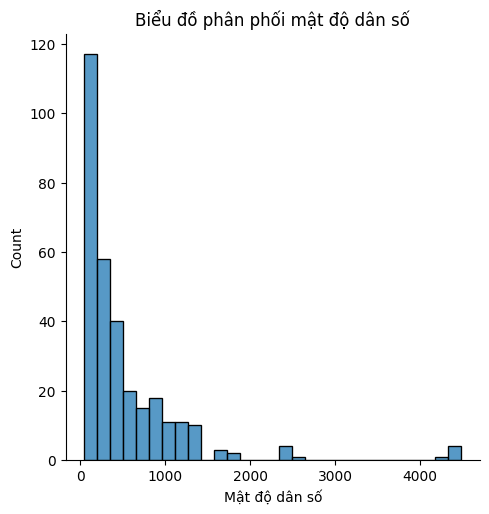

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for flipper length
sns.displot(df, x="Mật độ dân số")
plt.title("Biểu đồ phân phối mật độ dân số")
plt.show()

### Chuẩn hóa dữ liệu mật độ dân số

In [167]:
df['Mật độ dân số'] = np.log(df['Mật độ dân số'])

### Biểu đồ phân phối sau khi chuẩn hóa

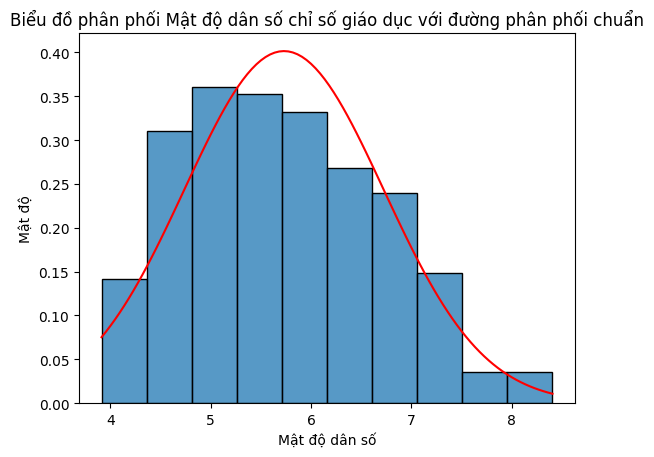

In [168]:
mean = df["Mật độ dân số"].mean()
std = df["Mật độ dân số"].std()


sns.histplot(df, x="Mật độ dân số", kde=False, stat="density")

x_values = np.linspace(df["Mật độ dân số"].min(), 
                       df["Mật độ dân số"].max(), 100)

pdf = norm.pdf(x_values, mean, std)

plt.plot(x_values, pdf, color='red')

plt.title("Biểu đồ phân phối Mật độ dân số chỉ số giáo dục với đường phân phối chuẩn")
plt.xlabel("Mật độ dân số")
plt.ylabel("Mật độ")

# Hiển thị biểu đồ
plt.show()

#### Hiển thị Boxplot của toàn bộ dữ liệu mật độ dân số

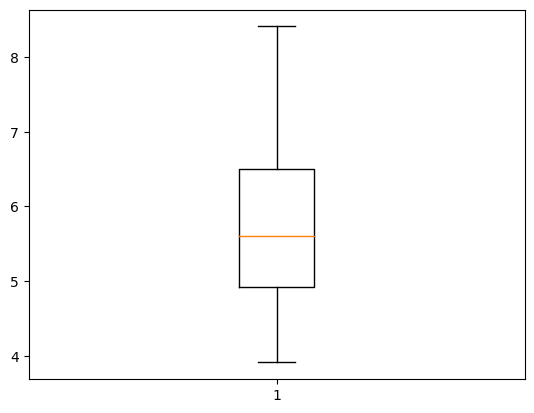

In [169]:
plt.boxplot(df["Mật độ dân số"])
plt.show()

### Biểu diễn đồ thị phân phối của Dân số trung bình

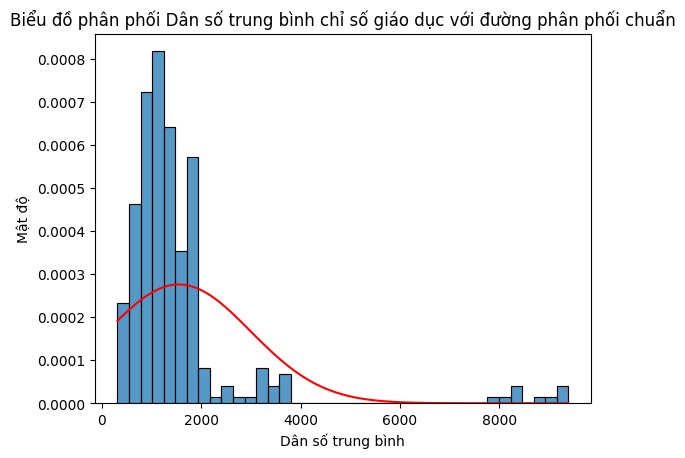

In [170]:
mean = df["Dân số trung bình"].mean()
std = df["Dân số trung bình"].std()


sns.histplot(df, x="Dân số trung bình", kde=False, stat="density")

x_values = np.linspace(df["Dân số trung bình"].min(), 
                       df["Dân số trung bình"].max(), 100)

pdf = norm.pdf(x_values, mean, std)

plt.plot(x_values, pdf, color='red')

plt.title("Biểu đồ phân phối Dân số trung bình chỉ số giáo dục với đường phân phối chuẩn")
plt.xlabel("Dân số trung bình")
plt.ylabel("Mật độ")

# Hiển thị biểu đồ
plt.show()

### Chuẩn hóa dữ liệu mật độ dân số

In [171]:
df['Dân số trung bình'] = np.log(df['Dân số trung bình'])

### Biểu đồ phân phối sau khi chuẩn hóa

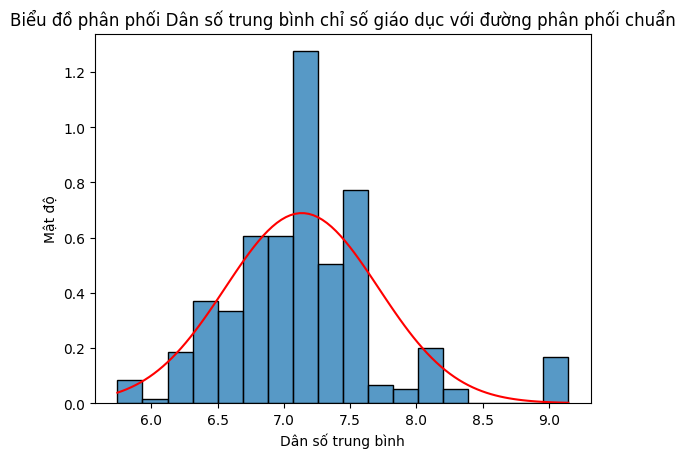

In [172]:
mean = df["Dân số trung bình"].mean()
std = df["Dân số trung bình"].std()


sns.histplot(df, x="Dân số trung bình", kde=False, stat="density")

x_values = np.linspace(df["Dân số trung bình"].min(), 
                       df["Dân số trung bình"].max(), 100)

pdf = norm.pdf(x_values, mean, std)

plt.plot(x_values, pdf, color='red')

plt.title("Biểu đồ phân phối Dân số trung bình chỉ số giáo dục với đường phân phối chuẩn")
plt.xlabel("Dân số trung bình")
plt.ylabel("Mật độ")

# Hiển thị biểu đồ
plt.show()

#### Hiển thị Boxplot của toàn bộ dữ liệu Dân số trung bình

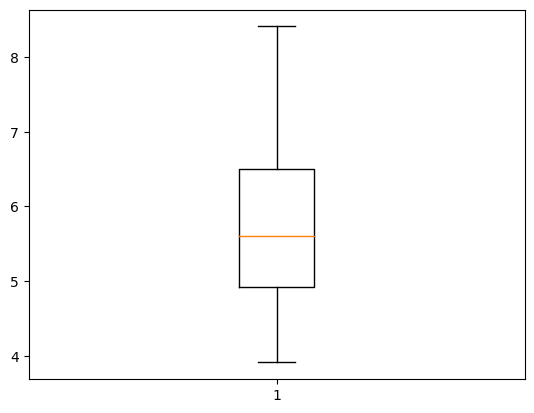

In [173]:
plt.boxplot(df["Mật độ dân số"])
plt.show()

### 9. Điểm thi

In [174]:
# Thư mục chứa các file CSV
source_folder = r'..\DATA\RAW DATA\Điểm thi THPTQG [2018-2023]\CSV_Files'
# Thư mục đích cho các file CSV mới
destination_folder = r'.\Điểm thi THPTQG [2018-2023]'
# Tạo file csv mới để thống kê TBC cho từng tỉnh, từng năm
destination_csv = r'university_scores_clean.csv'

In [175]:
# Tạo thư mục đích nếu nó chưa tồn tại
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

In [176]:
def normalize_province_name(name):
    if name == 'Thành phố Hà Nội':
        return 'Hà Nội'
    elif name == 'Thành phố Đà Nẵng':
        return 'Đà Nẵng'
    else:
        matches = difflib.get_close_matches(name, PROVINCE_NAMES)
        if matches:
            return matches[0]
        else:
            return name


def add_average_column(file_path, destination_folder, destination_csv):
    # Đọc file CSV
    df = pd.read_csv(file_path)

    # Lọc những dòng có điểm môn Anh khác 0
    df = df[df['Điểm Anh'] != 0]

    # Thêm cột TBC (Trung bình cộng)
    df['TBC'] = (df['Điểm Toán'] + df['Điểm Văn'] + df['Điểm Anh']) / 3

    # Lấy thông tin năm và địa phương từ tên file
    file_name = os.path.basename(file_path)
    name_without_extension = os.path.splitext(file_name)[0]
    year, province = name_without_extension.split('_')[:2]

    # Chuẩn hóa tên thành phố
    province = normalize_province_name(province)

    # Tạo tên file mới
    new_file_name = name_without_extension + '_clean.csv'
    new_file_path = os.path.join(destination_folder, new_file_name)

    # Lưu ra file CSV mới
    df.to_csv(new_file_path, index=False)
    
    return df['TBC'].mean(), year, province

In [177]:
# Tạo danh sách để tích lũy dữ liệu
data = []

# Lặp qua các file trong thư mục nguồn
for file_name in os.listdir(source_folder):
    if file_name.endswith('.csv'):
        file_path = os.path.join(source_folder, file_name)
        score, year, province = add_average_column(file_path, destination_folder, destination_csv)
        # Thêm dữ liệu vào danh sách
        data.append({'Địa phương': province, 'Năm': year, 'Giá trị': score})

# Tạo DataFrame từ danh sách
df_result = pd.DataFrame(data)

In [178]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Địa phương  378 non-null    object 
 1   Năm         378 non-null    object 
 2   Giá trị     378 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.0+ KB


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


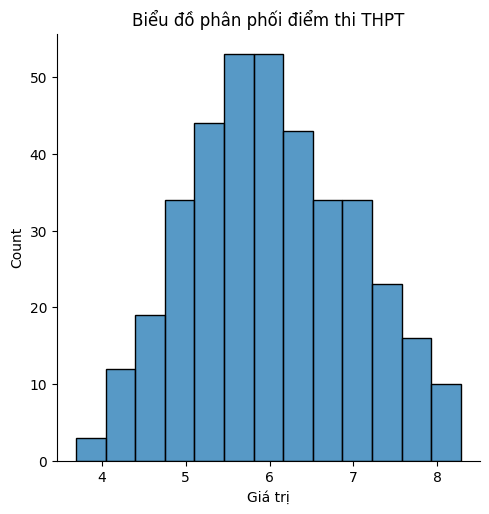

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for flipper length
sns.displot(df_result, x="Giá trị")
plt.title("Biểu đồ phân phối điểm thi THPT")
plt.show()

#### Hiển thị Boxplot của toàn bộ dữ liệu

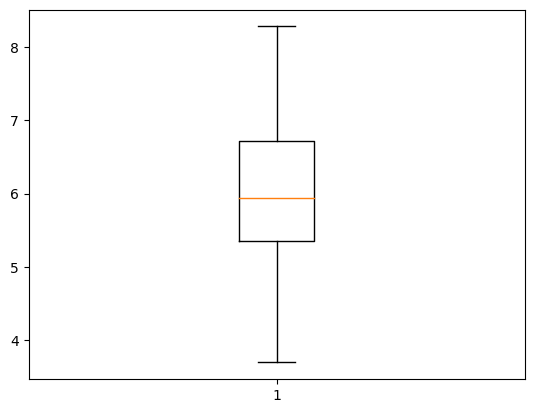

In [180]:
plt.boxplot(df_result["Giá trị"])
plt.show()

In [181]:
# Lưu DataFrame vào file CSV
df_result.to_csv(destination_csv, index=False)